# 당뇨병 환자 데이터를 사용한 실습

Diabetes dataset은 총 442명의 당뇨병 환자에 대한 자료이다.  
age, sex, body mass index, average blood pressure, 6개의 혈청값으로 이루어져 있다.  
442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터이다.

- 타겟 데이터 : 1년 뒤 측정한 당뇨병의 진행률

- 특징 데이터 (이 데이터셋의 특징 데이터는 모두 정규화된 값이다.)

  - Age
  - Sex
  - Body mass index
  - Average blood pressure
  - S1
  - S2
  - S3
  - S4
  - S5
  - S6


In [ ]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets

실습용 데이터를 다음과 같이 확인해 보자.

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
diabetes = datasets.load_diabetes() # load data
diabetes.data.shape # feature matrix shape

(442, 10)

In [ ]:
diabetes.target.shape # target vector shape

(442,)

In [ ]:
diabetes.feature_names # column names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### Linear Regression Model

In [ ]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.2, random_state=0)

### 다음과 같이 실습해 보자.
1. 회귀모형을 생성한다.
2. train 데이터를 활용하여 회귀계수를 계산한다.
3. 생성된 회귀모형의 R^2값을 확인해 보자.

In [ ]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

0.3322332173106184

### 회귀계수를 확인해 보자.

In [ ]:
model.coef_ # Get the coefficients

array([ -35.55025079, -243.16508959,  562.76234744,  305.46348218,
       -662.70290089,  324.20738537,   24.74879489,  170.3249615 ,
        731.63743545,   43.0309307 ])

In [ ]:
model.intercept_ # Get the intercept

152.5380470138517

### 생성된 모형으로 test데이터의 예측을 수행해 보시오.

In [ ]:
model.predict(X_test) # Predict unkown data

array([238.46949509, 248.92812015, 164.05732579, 120.30774826,
       187.42483427, 259.04746969, 113.55788482, 188.07762807,
       149.49521726, 236.00758247, 172.24561893, 178.87936198,
       109.16034679,  92.13333574, 243.32766187,  87.35445583,
       155.72165684,  66.98992013, 100.42233598, 218.0957236 ,
       196.6646301 , 161.2972646 , 161.70870434, 156.52404017,
       197.88770177, 167.58280539, 120.7427979 ,  84.84033238,
       192.03438449, 160.60496231, 175.17348034,  84.22759674,
       145.80002729, 145.97264454, 140.96436257, 197.00423168,
       165.94319214, 190.6597389 , 128.22361933, 206.41497077,
        84.3575017 , 164.02262498, 144.10639773, 184.68996616,
       177.80076449,  74.33261184, 143.36644877, 138.68063137,
       120.80857573, 234.34288711, 161.94132344,  74.54325994,
       154.71683591, 156.78815442, 237.41798756, 174.23210042,
       190.87871793, 118.98140389, 132.20521501, 168.52914416,
       214.73950634, 171.42284128, 157.37648738, 108.86

### MSE

모형의 예측값과 실제값 사이의 차이가 작을수록 좋은 모형으로 평가할 수 있다.

In [ ]:
from sklearn.metrics import mean_squared_error

y_true = y_test
y_pred = model.predict(X_test)

mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)

print("MSE = ", mse, "\tRMSE = ", rmse)

MSE =  3424.259334298692 	RMSE =  58.51717127731562


### 테스트 데이터와 예측값을 그래프에 표시해 보자.
예측이 정확하다면 45도 직선식에 가깝게 표시될 것이다.

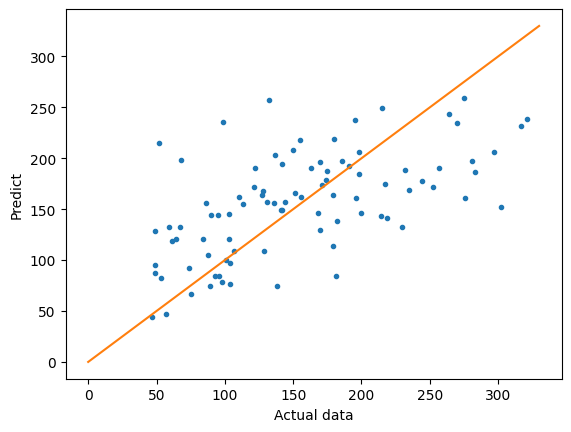

In [ ]:
# plot prediction and actual data
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')
plt.xlabel('Actual data')
plt.ylabel('Predict')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()